In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

In [ ]:
ticker = "^NSEI"

# Define the date range for the historical data
start_date = "2014-01-01"
end_date = "2018-12-31"

# Retrieve historical data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Print the first few rows of the dataset
print(data.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-01-02  6301.250000  6358.299805  6211.299805  6221.149902  6221.149902   
2014-01-03  6194.549805  6221.700195  6171.250000  6211.149902  6211.149902   
2014-01-06  6220.850098  6224.700195  6170.250000  6191.450195  6191.450195   
2014-01-07  6203.899902  6221.500000  6144.750000  6162.250000  6162.250000   
2014-01-08  6178.049805  6192.100098  6160.350098  6174.600098  6174.600098   

            Volume  
Date                
2014-01-02  158100  
2014-01-03  139000  
2014-01-06  118300  
2014-01-07  138600  
2014-01-08  146900  


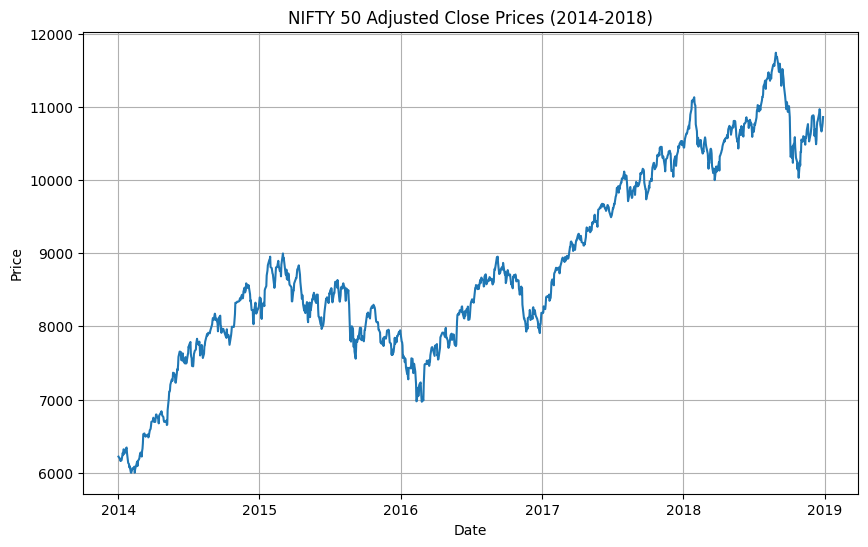

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'])
plt.title('NIFTY 50 Adjusted Close Prices (2014-2018)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
data=data.drop(['Adj Close'],axis=1)

In [ ]:
features = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Scale the features using Min-Max Scaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)



In [ ]:
features_oc = data[['Open', 'Close']]

# Scale the features using Min-Max Scaler
scaler_oc = MinMaxScaler()
scaled_features_oc = scaler_oc.fit_transform(features_oc)

In [ ]:
features_ocl = data[['Open','Low', 'Close']]

# Scale the features using Min-Max Scaler
scaler_ocl = MinMaxScaler()
scaled_features_ocl = scaler_ocl.fit_transform(features_ocl)

In [ ]:
features_oclh = data[['Open','Low','High','Close']]

# Scale the features using Min-Max Scaler
scaler_oclh = MinMaxScaler()
scaled_features_oclh = scaler_oclh.fit_transform(features_oclh)

In [ ]:
features1=data['Close']
features1=np.array(features1)
scaler3 = MinMaxScaler()
scaled_features3 = scaler3.fit_transform(features1.reshape(-1,1))



In [ ]:
normalized=pd.DataFrame()

In [ ]:
normalized = data.copy()
normalized[['Open', 'High', 'Low', 'Close', 'Volume']] = scaled_features


In [ ]:
normalized_oc = data.copy()
normalized_oc[['Open', 'Close']] = scaled_features_oc

In [ ]:
normalized_ocl = data.copy()
normalized_ocl[['Open','Low', 'Close']] = scaled_features_ocl

In [ ]:
normalized_oclh = data.copy()
normalized_oclh[['Open','Low','High', 'Close']] = scaled_features_oclh

In [ ]:
normalized_oc=normalized_oc.drop(['High','Low','Volume'],axis=1)

In [ ]:
normalized_ocl=normalized_ocl.drop(['High','Volume'],axis=1)

In [ ]:
normalized_oclh=normalized_oclh.drop(['Volume'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(normalized, test_size=0.2, shuffle=False)

In [ ]:
train_data_oc, test_data_oc = train_test_split(normalized_oc, test_size=0.2, shuffle=False)

In [ ]:
train_data_ocl, test_data_ocl = train_test_split(normalized_ocl, test_size=0.2, shuffle=False)

In [ ]:
train_data_oclh, test_data_oclh = train_test_split(normalized_oclh, test_size=0.2, shuffle=False)

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense


In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][3])
    return np.array(sequences), np.array(targets)


In [ ]:
normalized_oclh.head()

,Open,High,Low,Close
Date,,,,
2014-01-02,0.060930,0.059296,0.048120,0.038387
2014-01-03,0.042547,0.035508,0.041188,0.036644
2014-01-06,0.047078,0.036030,0.041015,0.033211
2014-01-07,0.044158,0.035473,0.036601,0.028122
2014-01-08,0.039704,0.030353,0.039301,0.030274


In [ ]:
def create_sequences_oc(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][1])
    return np.array(sequences), np.array(targets)

In [ ]:
def create_sequences_ocl(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][2])
    return np.array(sequences), np.array(targets)

In [ ]:
def create_sequences_oclh(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][3])
    return np.array(sequences), np.array(targets)

In [ ]:
sequence_length = 10

In [ ]:
print(train_data.values.shape)

(976, 5)


In [ ]:
X_train, y_train = create_sequences(train_data.values, sequence_length)
X_test, y_test = create_sequences(test_data.values, sequence_length)

In [ ]:
X_train_oc, y_train_oc = create_sequences_oc(train_data_oc.values, sequence_length)
X_test_oc, y_test_oc = create_sequences_oc(test_data_oc.values, sequence_length)

In [ ]:
X_train_ocl, y_train_ocl = create_sequences_ocl(train_data_ocl.values, sequence_length)
X_test_ocl, y_test_ocl = create_sequences_ocl(test_data_ocl.values, sequence_length)

In [ ]:
X_train_oclh, y_train_oclh = create_sequences_oclh(train_data_oclh.values, sequence_length)
X_test_oclh, y_test_oclh = create_sequences_oclh(test_data_oclh.values, sequence_length)

In [ ]:
k = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=k)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(sequence_length, 5), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))


In [ ]:
model_oc = Sequential()
model_oc.add(SimpleRNN(units=64, input_shape=(sequence_length, 2), return_sequences=True))
model_oc.add(Dropout(0.2))
model_oc.add(SimpleRNN(units=64))
model_oc.add(Dropout(0.2))
model_oc.add(Dense(units=32, activation='relu'))
model_oc.add(Dense(units=1))

In [ ]:
model_ocl = Sequential()
model_ocl.add(SimpleRNN(units=64, input_shape=(sequence_length, 3), return_sequences=True))
model_ocl.add(Dropout(0.2))
model_ocl.add(SimpleRNN(units=64))
model_ocl.add(Dropout(0.2))
model_ocl.add(Dense(units=32, activation='relu'))
model_ocl.add(Dense(units=1))

In [ ]:
model_oclh = Sequential()
model_oclh.add(SimpleRNN(units=64, input_shape=(sequence_length, 4), return_sequences=True))
model_oclh.add(Dropout(0.2))
model_oclh.add(SimpleRNN(units=64))
model_oclh.add(Dropout(0.2))
model_oclh.add(Dense(units=32, activation='relu'))
model_oclh.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_oc.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_ocl.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_oclh.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 64)            4480      
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,849
Trainable params: 14,849
Non-traina

In [ ]:
# for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
#     print(f"Fold {fold+1}/{k}")

#     X_train1, X_val = X_train[train_index], X_train[val_index]
#     y_train1, y_val = y_train[train_index], y_train[val_index]

#     # Train the model on the training data from all the folds
# model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))

    # # Evaluate the model on the validation set for the current fold
    # val_loss = model.evaluate(X_val, y_val)
    # print("Validation Loss:", val_loss)
    # print("-" * 100)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/500
59/61 [============================>.] - ETA: 0s - loss: 0.0631
Epoch 1: val_loss improved from inf to 0.04430, saving model to best_model.h5
61/61 [==============================] - 7s 33ms/step - loss: 0.0620 - val_loss: 0.0443
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 0.0136
Epoch 2: val_loss improved from 0.04430 to 0.01983, saving model to best_model.h5
61/61 [==============================] - 1s 19ms/step - loss: 0.0136 - val_loss: 0.0198
Epoch 3/500
58/61 [===========================>..] - ETA: 0s - loss: 0.0060
Epoch 3: val_loss improved from 0.01983 to 0.01131, saving model to best_model.h5
61/61 [==============================] - 1s 20ms/step - loss: 0.0060 - val_loss: 0.0113
Epoch 4/500
59/61 [============================>.] - ETA: 0s - loss: 0.0050
Epoch 4: val_loss improved from 0.01131 to 0.00237, saving model to best_model.h5
61/61 [==============================] - 1s 20ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 5/500
59/61 [=

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model_oc.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history_oc = model_oc.fit(X_train_oc, y_train_oc, epochs=500, batch_size=16, validation_data=(X_test_oc, y_test_oc), callbacks=[checkpoint])

Epoch 1/500
55/61 [==========================>...] - ETA: 0s - loss: 0.0363
Epoch 1: val_loss improved from inf to 0.01242, saving model to best_model_oc.h5
61/61 [==============================] - 4s 16ms/step - loss: 0.0342 - val_loss: 0.0124
Epoch 2/500
56/61 [==========================>...] - ETA: 0s - loss: 0.0074
Epoch 2: val_loss improved from 0.01242 to 0.00497, saving model to best_model_oc.h5
61/61 [==============================] - 1s 10ms/step - loss: 0.0074 - val_loss: 0.0050
Epoch 3/500
55/61 [==========================>...] - ETA: 0s - loss: 0.0057
Epoch 3: val_loss did not improve from 0.00497
61/61 [==============================] - 1s 9ms/step - loss: 0.0056 - val_loss: 0.0071
Epoch 4/500
56/61 [==========================>...] - ETA: 0s - loss: 0.0045
Epoch 4: val_loss did not improve from 0.00497
61/61 [==============================] - 1s 9ms/step - loss: 0.0044 - val_loss: 0.0114
Epoch 5/500
57/61 [===========================>..] - ETA: 0s - loss: 0.0031
Epoch 5: v

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model_ocl.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history_ocl = model_ocl.fit(X_train_ocl, y_train_ocl, epochs=500, batch_size=16, validation_data=(X_test_ocl, y_test_ocl), callbacks=[checkpoint])

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 0.0314
Epoch 1: val_loss improved from inf to 0.01163, saving model to best_model_ocl.h5
61/61 [==============================] - 3s 17ms/step - loss: 0.0314 - val_loss: 0.0116
Epoch 2/500
57/61 [===========================>..] - ETA: 0s - loss: 0.0077
Epoch 2: val_loss did not improve from 0.01163
61/61 [==============================] - 1s 8ms/step - loss: 0.0076 - val_loss: 0.0167
Epoch 3/500
55/61 [==========================>...] - ETA: 0s - loss: 0.0054
Epoch 3: val_loss improved from 0.01163 to 0.00914, saving model to best_model_ocl.h5
61/61 [==============================] - 1s 10ms/step - loss: 0.0053 - val_loss: 0.0091
Epoch 4/500
56/61 [==========================>...] - ETA: 0s - loss: 0.0045
Epoch 4: val_loss improved from 0.00914 to 0.00815, saving model to best_model_ocl.h5
61/61 [==============================] - 1s 10ms/step - loss: 0.0044 - val_loss: 0.0082
Epoch 5/500
55/61 [=========================

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model_oclh.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history_oclh = model_oclh.fit(X_train_oclh, y_train_oclh, epochs=500, batch_size=16, validation_data=(X_test_oclh, y_test_oclh), callbacks=[checkpoint])

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 0.0511
Epoch 1: val_loss improved from inf to 0.00244, saving model to best_model_oclh.h5
61/61 [==============================] - 4s 19ms/step - loss: 0.0511 - val_loss: 0.0024
Epoch 2/500
58/61 [===========================>..] - ETA: 0s - loss: 0.0113
Epoch 2: val_loss did not improve from 0.00244
61/61 [==============================] - 1s 13ms/step - loss: 0.0111 - val_loss: 0.0078
Epoch 3/500
60/61 [============================>.] - ETA: 0s - loss: 0.0061
Epoch 3: val_loss did not improve from 0.00244
61/61 [==============================] - 1s 13ms/step - loss: 0.0061 - val_loss: 0.0090
Epoch 4/500
58/61 [===========================>..] - ETA: 0s - loss: 0.0052
Epoch 4: val_loss improved from 0.00244 to 0.00183, saving model to best_model_oclh.h5
61/61 [==============================] - 1s 13ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 5/500
55/61 [==========================>...] - ETA: 0s - loss: 0.0048
Epoc

In [ ]:
from keras.models import load_model

# Assuming you have prepared the new data for prediction as 'X_new'

# Load the best model saved during training
best_model = load_model('best_model.h5')

# Make predictions using the loaded model
y_pred = best_model.predict(X_test)


8/8 [==============================] - 0s 3ms/step


In [ ]:
from keras.models import load_model


In [ ]:
best_model_oc = load_model('best_model_oc.h5')

# Make predictions using the loaded model
y_pred_oc = best_model_oc.predict(X_test_oc)

8/8 [==============================] - 0s 3ms/step


In [ ]:
best_model_ocl = load_model('best_model_ocl.h5')

# Make predictions using the loaded model
y_pred_ocl = best_model_ocl.predict(X_test_ocl)

8/8 [==============================] - 0s 3ms/step


In [ ]:
best_model_oclh = load_model('best_model_oclh.h5')

# Make predictions using the loaded model
y_pred_oclh = best_model_oclh.predict(X_test_oclh)

8/8 [==============================] - 0s 5ms/step


In [ ]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 5ms/step


In [ ]:
y_pred_oc = model_oc.predict(X_test_oc)

8/8 [==============================] - 0s 4ms/step


In [ ]:
y_pred_ocl = model_ocl.predict(X_test_ocl)

8/8 [==============================] - 0s 4ms/step


In [ ]:
y_pred_oclh = model_oclh.predict(X_test_oclh)

8/8 [==============================] - 1s 3ms/step


In [ ]:
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00778689936090019


In [ ]:
mse = np.mean((y_test_oc - y_pred_oc)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.011166212217142008


In [ ]:
mse = np.mean((y_test_ocl - y_pred_ocl)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.009066194603140084


In [ ]:
mse = np.mean((y_test_oclh - y_pred_oclh)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.007613428963595096


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_val = r2_score(y_test, y_pred)

print("R-squared :", r2_val)

NameError: ignored

In [ ]:
r2_val = r2_score(y_test_oc, y_pred_oc)

print("R-squared :", r2_val)

R-squared : -0.036104112121917664


In [ ]:
r2_val = r2_score(y_test_ocl, y_pred_ocl)

print("R-squared :", r2_val)

R-squared : 0.4897063770718614


In [ ]:
r2_val = r2_score(y_test_oclh, y_pred_oclh)

print("R-squared :", r2_val)

R-squared : 0.5472667040831455


In [ ]:
y_pred_orig = scaler3.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = scaler3.inverse_transform(y_test.reshape(-1,1))
y_train_orig= scaler3.inverse_transform(y_train.reshape(-1,1))

In [ ]:
y_pred_orig_oc = scaler3.inverse_transform(y_pred_oc.reshape(-1,1))
y_test_orig_oc = scaler3.inverse_transform(y_test_oc.reshape(-1,1))
y_train_orig_oc= scaler3.inverse_transform(y_train_oc.reshape(-1,1))

In [ ]:
y_pred_orig_ocl = scaler3.inverse_transform(y_pred_ocl.reshape(-1,1))
y_test_orig_ocl = scaler3.inverse_transform(y_test_ocl.reshape(-1,1))
y_train_orig_ocl= scaler3.inverse_transform(y_train_ocl.reshape(-1,1))

In [ ]:
y_pred_orig_oclh = scaler3.inverse_transform(y_pred_oclh.reshape(-1,1))
y_test_orig_oclh = scaler3.inverse_transform(y_test_oclh.reshape(-1,1))
y_train_orig_oclh= scaler3.inverse_transform(y_train_oclh.reshape(-1,1))

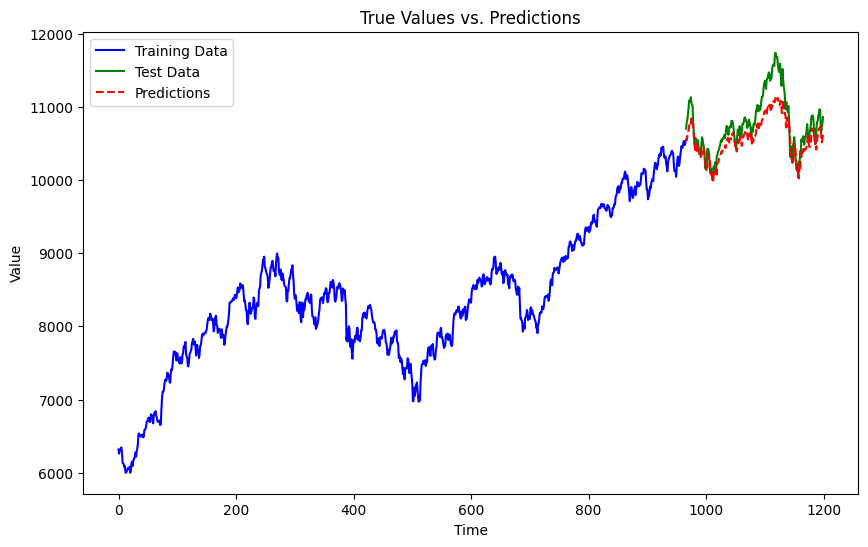

In [ ]:
time_index_train = np.arange(len(y_train))

# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test)) + len(y_train)
time_index_pred = np.arange(len(y_pred)) + len(y_train)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig, label='Predictions', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True Values vs. Predictions')
plt.legend()

plt.show()

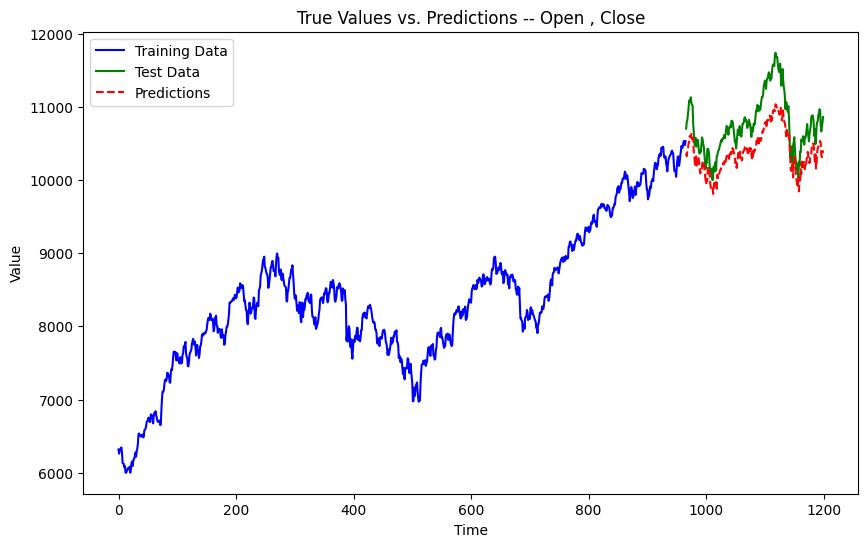

In [ ]:
time_index_train = np.arange(len(y_train_oc))

# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test_oc)) + len(y_train_oc)
time_index_pred = np.arange(len(y_pred_oc)) + len(y_train_oc)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig_oc, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig_oc, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig_oc, label='Predictions', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True Values vs. Predictions -- Open , Close')
plt.legend()

plt.show()

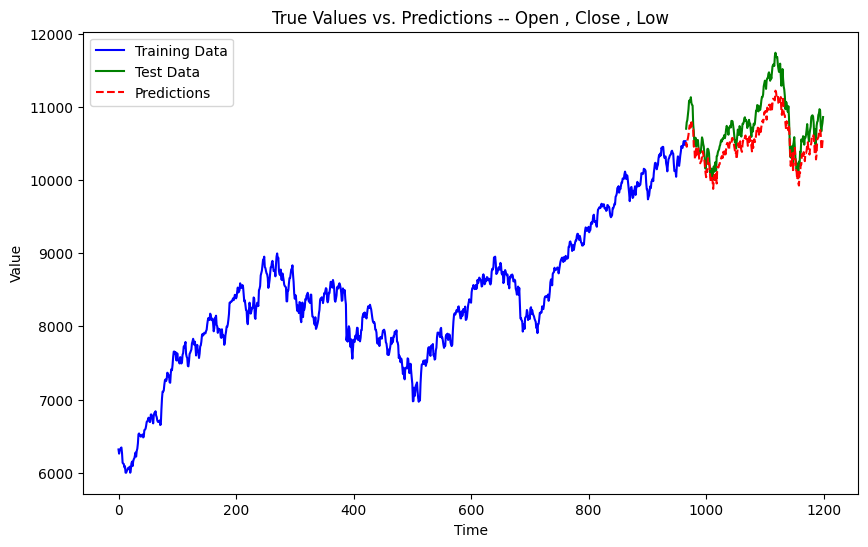

In [ ]:
time_index_train = np.arange(len(y_train_ocl))

# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test_ocl)) + len(y_train_ocl)
time_index_pred = np.arange(len(y_pred_ocl)) + len(y_train_ocl)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig_ocl, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig_ocl, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig_ocl, label='Predictions', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True Values vs. Predictions -- Open , Close , Low')
plt.legend()

plt.show()

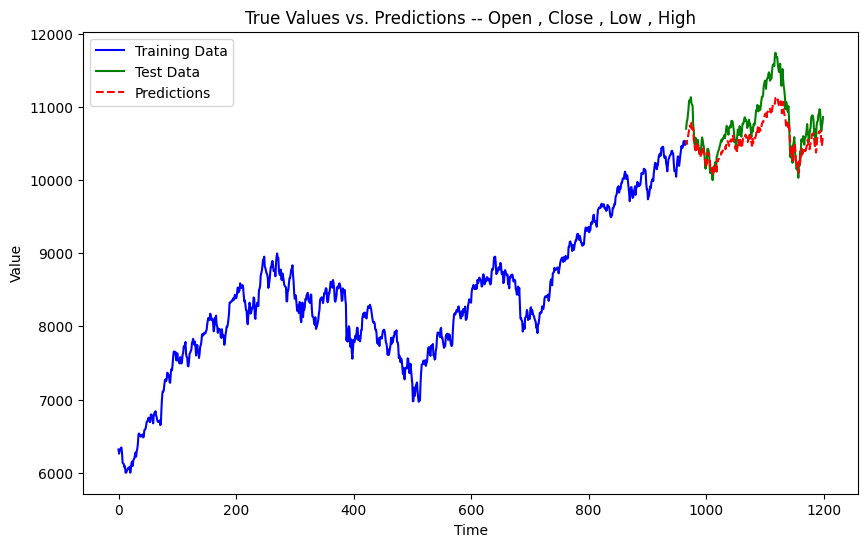

In [ ]:
time_index_train = np.arange(len(y_train_oclh))

# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test_oclh)) + len(y_train_oclh)
time_index_pred = np.arange(len(y_pred_oclh)) + len(y_train_oclh)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig_oclh, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig_oclh, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig_oclh, label='Predictions', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True Values vs. Predictions -- Open , Close , Low , High')
plt.legend()

plt.show()